121 121 121 121 121


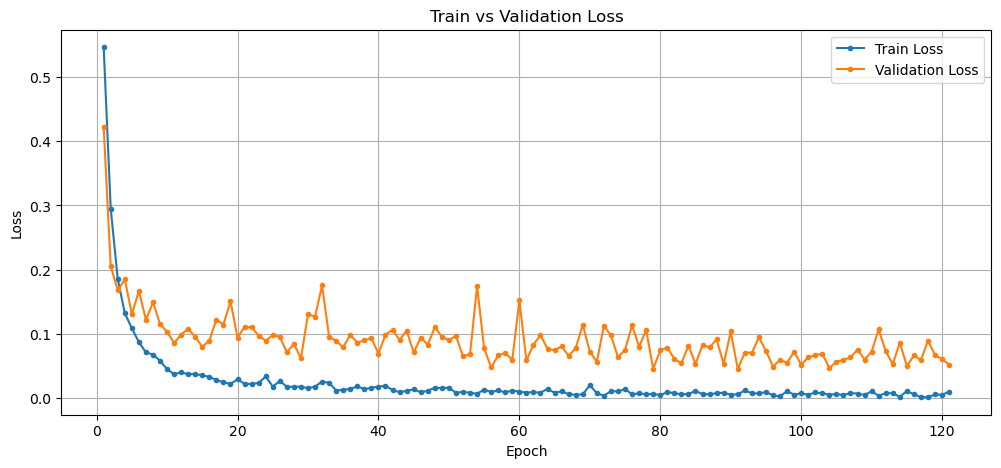

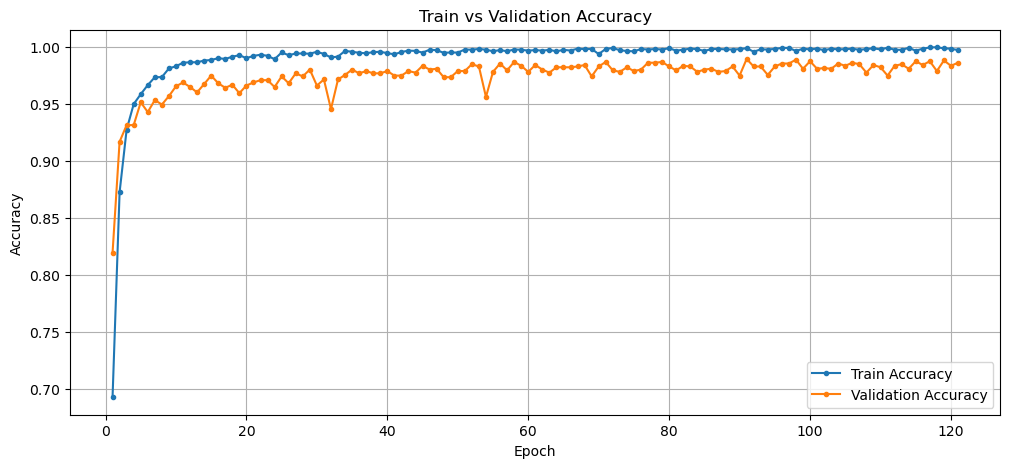

In [1]:
import re
import matplotlib.pyplot as plt

log_text = """
Best model saved at: best_model_efficientnet_b7.pth
Epoch 1/200 | Train Loss: 0.5465, Acc: 0.6926 | Val Loss: 0.4216, Acc: 0.8193
Best model saved at: best_model_efficientnet_b7.pth
Epoch 2/200 | Train Loss: 0.2950, Acc: 0.8724 | Val Loss: 0.2053, Acc: 0.9167
Best model saved at: best_model_efficientnet_b7.pth
Epoch 3/200 | Train Loss: 0.1853, Acc: 0.9274 | Val Loss: 0.1680, Acc: 0.9313
Epoch 4/200 | Train Loss: 0.1322, Acc: 0.9497 | Val Loss: 0.1850, Acc: 0.9313
Best model saved at: best_model_efficientnet_b7.pth
Epoch 5/200 | Train Loss: 0.1086, Acc: 0.9584 | Val Loss: 0.1306, Acc: 0.9513
Epoch 6/200 | Train Loss: 0.0872, Acc: 0.9664 | Val Loss: 0.1670, Acc: 0.9427
Best model saved at: best_model_efficientnet_b7.pth
Epoch 7/200 | Train Loss: 0.0711, Acc: 0.9733 | Val Loss: 0.1219, Acc: 0.9533
Epoch 8/200 | Train Loss: 0.0679, Acc: 0.9734 | Val Loss: 0.1493, Acc: 0.9493
Best model saved at: best_model_efficientnet_b7.pth
Epoch 9/200 | Train Loss: 0.0581, Acc: 0.9810 | Val Loss: 0.1154, Acc: 0.9567
Best model saved at: best_model_efficientnet_b7.pth
Epoch 10/200 | Train Loss: 0.0450, Acc: 0.9829 | Val Loss: 0.1032, Acc: 0.9653
Best model saved at: best_model_efficientnet_b7.pth
Epoch 11/200 | Train Loss: 0.0372, Acc: 0.9860 | Val Loss: 0.0858, Acc: 0.9687
Epoch 12/200 | Train Loss: 0.0402, Acc: 0.9864 | Val Loss: 0.0990, Acc: 0.9647
Epoch 13/200 | Train Loss: 0.0373, Acc: 0.9864 | Val Loss: 0.1079, Acc: 0.9600
Epoch 14/200 | Train Loss: 0.0375, Acc: 0.9879 | Val Loss: 0.0954, Acc: 0.9673
Best model saved at: best_model_efficientnet_b7.pth
Epoch 15/200 | Train Loss: 0.0354, Acc: 0.9884 | Val Loss: 0.0798, Acc: 0.9747
Epoch 16/200 | Train Loss: 0.0331, Acc: 0.9900 | Val Loss: 0.0896, Acc: 0.9680
Epoch 17/200 | Train Loss: 0.0282, Acc: 0.9893 | Val Loss: 0.1224, Acc: 0.9640
Epoch 18/200 | Train Loss: 0.0246, Acc: 0.9913 | Val Loss: 0.1145, Acc: 0.9667
Epoch 19/200 | Train Loss: 0.0221, Acc: 0.9926 | Val Loss: 0.1510, Acc: 0.9593
Epoch 20/200 | Train Loss: 0.0292, Acc: 0.9900 | Val Loss: 0.0940, Acc: 0.9660
Epoch 21/200 | Train Loss: 0.0223, Acc: 0.9920 | Val Loss: 0.1114, Acc: 0.9687
Epoch 22/200 | Train Loss: 0.0221, Acc: 0.9930 | Val Loss: 0.1102, Acc: 0.9707
Epoch 23/200 | Train Loss: 0.0237, Acc: 0.9921 | Val Loss: 0.0973, Acc: 0.9707
Epoch 24/200 | Train Loss: 0.0337, Acc: 0.9891 | Val Loss: 0.0894, Acc: 0.9647
Epoch 25/200 | Train Loss: 0.0179, Acc: 0.9950 | Val Loss: 0.0981, Acc: 0.9740
Epoch 26/200 | Train Loss: 0.0267, Acc: 0.9926 | Val Loss: 0.0953, Acc: 0.9680
Best model saved at: best_model_efficientnet_b7.pth
Epoch 27/200 | Train Loss: 0.0177, Acc: 0.9941 | Val Loss: 0.0716, Acc: 0.9767
Epoch 28/200 | Train Loss: 0.0177, Acc: 0.9941 | Val Loss: 0.0845, Acc: 0.9740
Best model saved at: best_model_efficientnet_b7.pth
Epoch 29/200 | Train Loss: 0.0179, Acc: 0.9939 | Val Loss: 0.0619, Acc: 0.9800
Epoch 30/200 | Train Loss: 0.0154, Acc: 0.9956 | Val Loss: 0.1304, Acc: 0.9660
Epoch 31/200 | Train Loss: 0.0180, Acc: 0.9937 | Val Loss: 0.1270, Acc: 0.9713
Epoch 32/200 | Train Loss: 0.0258, Acc: 0.9906 | Val Loss: 0.1754, Acc: 0.9453
Epoch 33/200 | Train Loss: 0.0239, Acc: 0.9914 | Val Loss: 0.0954, Acc: 0.9713
Epoch 34/200 | Train Loss: 0.0118, Acc: 0.9964 | Val Loss: 0.0892, Acc: 0.9753
Epoch 35/200 | Train Loss: 0.0129, Acc: 0.9956 | Val Loss: 0.0791, Acc: 0.9800
Epoch 36/200 | Train Loss: 0.0142, Acc: 0.9947 | Val Loss: 0.0988, Acc: 0.9767
Epoch 37/200 | Train Loss: 0.0184, Acc: 0.9943 | Val Loss: 0.0864, Acc: 0.9787
Epoch 38/200 | Train Loss: 0.0139, Acc: 0.9953 | Val Loss: 0.0898, Acc: 0.9767
Epoch 39/200 | Train Loss: 0.0162, Acc: 0.9956 | Val Loss: 0.0935, Acc: 0.9767
Epoch 40/200 | Train Loss: 0.0178, Acc: 0.9944 | Val Loss: 0.0692, Acc: 0.9787
Epoch 41/200 | Train Loss: 0.0194, Acc: 0.9934 | Val Loss: 0.0987, Acc: 0.9747
Epoch 42/200 | Train Loss: 0.0125, Acc: 0.9954 | Val Loss: 0.1067, Acc: 0.9747
Epoch 43/200 | Train Loss: 0.0093, Acc: 0.9966 | Val Loss: 0.0905, Acc: 0.9787
Epoch 44/200 | Train Loss: 0.0113, Acc: 0.9964 | Val Loss: 0.1050, Acc: 0.9773
Epoch 45/200 | Train Loss: 0.0137, Acc: 0.9949 | Val Loss: 0.0713, Acc: 0.9833
Epoch 46/200 | Train Loss: 0.0091, Acc: 0.9974 | Val Loss: 0.0942, Acc: 0.9800
Epoch 47/200 | Train Loss: 0.0114, Acc: 0.9970 | Val Loss: 0.0832, Acc: 0.9807
Epoch 48/200 | Train Loss: 0.0165, Acc: 0.9947 | Val Loss: 0.1105, Acc: 0.9733
Epoch 49/200 | Train Loss: 0.0155, Acc: 0.9950 | Val Loss: 0.0956, Acc: 0.9733
Epoch 50/200 | Train Loss: 0.0163, Acc: 0.9949 | Val Loss: 0.0900, Acc: 0.9787
Epoch 51/200 | Train Loss: 0.0082, Acc: 0.9976 | Val Loss: 0.0971, Acc: 0.9787
Epoch 52/200 | Train Loss: 0.0100, Acc: 0.9974 | Val Loss: 0.0652, Acc: 0.9847
Epoch 53/200 | Train Loss: 0.0082, Acc: 0.9981 | Val Loss: 0.0682, Acc: 0.9827
Epoch 54/200 | Train Loss: 0.0069, Acc: 0.9974 | Val Loss: 0.1743, Acc: 0.9560
Epoch 55/200 | Train Loss: 0.0133, Acc: 0.9961 | Val Loss: 0.0778, Acc: 0.9780
Best model saved at: best_model_efficientnet_b7.pth
Epoch 56/200 | Train Loss: 0.0096, Acc: 0.9971 | Val Loss: 0.0478, Acc: 0.9853
Epoch 57/200 | Train Loss: 0.0119, Acc: 0.9961 | Val Loss: 0.0665, Acc: 0.9793
Epoch 58/200 | Train Loss: 0.0089, Acc: 0.9976 | Val Loss: 0.0698, Acc: 0.9867
Epoch 59/200 | Train Loss: 0.0118, Acc: 0.9974 | Val Loss: 0.0599, Acc: 0.9833
Epoch 60/200 | Train Loss: 0.0102, Acc: 0.9966 | Val Loss: 0.1522, Acc: 0.9780
Epoch 61/200 | Train Loss: 0.0085, Acc: 0.9971 | Val Loss: 0.0586, Acc: 0.9840
Epoch 62/200 | Train Loss: 0.0095, Acc: 0.9966 | Val Loss: 0.0833, Acc: 0.9800
Epoch 63/200 | Train Loss: 0.0084, Acc: 0.9973 | Val Loss: 0.0983, Acc: 0.9773
Epoch 64/200 | Train Loss: 0.0145, Acc: 0.9960 | Val Loss: 0.0766, Acc: 0.9820
Epoch 65/200 | Train Loss: 0.0083, Acc: 0.9973 | Val Loss: 0.0747, Acc: 0.9820
Epoch 66/200 | Train Loss: 0.0104, Acc: 0.9967 | Val Loss: 0.0804, Acc: 0.9820
Epoch 67/200 | Train Loss: 0.0062, Acc: 0.9983 | Val Loss: 0.0659, Acc: 0.9827
Epoch 68/200 | Train Loss: 0.0052, Acc: 0.9980 | Val Loss: 0.0778, Acc: 0.9840
Epoch 69/200 | Train Loss: 0.0058, Acc: 0.9981 | Val Loss: 0.1142, Acc: 0.9740
Epoch 70/200 | Train Loss: 0.0202, Acc: 0.9936 | Val Loss: 0.0724, Acc: 0.9827
Epoch 71/200 | Train Loss: 0.0075, Acc: 0.9981 | Val Loss: 0.0565, Acc: 0.9867
Epoch 72/200 | Train Loss: 0.0039, Acc: 0.9989 | Val Loss: 0.1127, Acc: 0.9793
Epoch 73/200 | Train Loss: 0.0108, Acc: 0.9970 | Val Loss: 0.0977, Acc: 0.9780
Epoch 74/200 | Train Loss: 0.0104, Acc: 0.9963 | Val Loss: 0.0636, Acc: 0.9820
Epoch 75/200 | Train Loss: 0.0140, Acc: 0.9960 | Val Loss: 0.0752, Acc: 0.9787
Epoch 76/200 | Train Loss: 0.0059, Acc: 0.9980 | Val Loss: 0.1133, Acc: 0.9800
Epoch 77/200 | Train Loss: 0.0075, Acc: 0.9976 | Val Loss: 0.0800, Acc: 0.9860
Epoch 78/200 | Train Loss: 0.0058, Acc: 0.9980 | Val Loss: 0.1060, Acc: 0.9860
Best model saved at: best_model_efficientnet_b7.pth
Epoch 79/200 | Train Loss: 0.0067, Acc: 0.9976 | Val Loss: 0.0457, Acc: 0.9867
Epoch 80/200 | Train Loss: 0.0047, Acc: 0.9987 | Val Loss: 0.0744, Acc: 0.9827
Epoch 81/200 | Train Loss: 0.0093, Acc: 0.9966 | Val Loss: 0.0787, Acc: 0.9793
Epoch 82/200 | Train Loss: 0.0076, Acc: 0.9974 | Val Loss: 0.0613, Acc: 0.9833
Epoch 83/200 | Train Loss: 0.0060, Acc: 0.9984 | Val Loss: 0.0542, Acc: 0.9827
Epoch 84/200 | Train Loss: 0.0062, Acc: 0.9979 | Val Loss: 0.0818, Acc: 0.9780
Epoch 85/200 | Train Loss: 0.0114, Acc: 0.9963 | Val Loss: 0.0532, Acc: 0.9800
Epoch 86/200 | Train Loss: 0.0062, Acc: 0.9980 | Val Loss: 0.0827, Acc: 0.9807
Epoch 87/200 | Train Loss: 0.0059, Acc: 0.9981 | Val Loss: 0.0790, Acc: 0.9780
Epoch 88/200 | Train Loss: 0.0078, Acc: 0.9977 | Val Loss: 0.0913, Acc: 0.9787
Epoch 89/200 | Train Loss: 0.0082, Acc: 0.9976 | Val Loss: 0.0532, Acc: 0.9827
Epoch 90/200 | Train Loss: 0.0055, Acc: 0.9979 | Val Loss: 0.1038, Acc: 0.9747
Best model saved at: best_model_efficientnet_b7.pth
Epoch 91/200 | Train Loss: 0.0059, Acc: 0.9987 | Val Loss: 0.0452, Acc: 0.9893
Epoch 92/200 | Train Loss: 0.0119, Acc: 0.9957 | Val Loss: 0.0708, Acc: 0.9827
Epoch 93/200 | Train Loss: 0.0075, Acc: 0.9977 | Val Loss: 0.0706, Acc: 0.9827
Epoch 94/200 | Train Loss: 0.0072, Acc: 0.9976 | Val Loss: 0.0947, Acc: 0.9753
Epoch 95/200 | Train Loss: 0.0096, Acc: 0.9981 | Val Loss: 0.0735, Acc: 0.9827
Epoch 96/200 | Train Loss: 0.0042, Acc: 0.9990 | Val Loss: 0.0491, Acc: 0.9853
Epoch 97/200 | Train Loss: 0.0029, Acc: 0.9990 | Val Loss: 0.0598, Acc: 0.9853
Epoch 98/200 | Train Loss: 0.0108, Acc: 0.9963 | Val Loss: 0.0550, Acc: 0.9887
Epoch 99/200 | Train Loss: 0.0053, Acc: 0.9983 | Val Loss: 0.0723, Acc: 0.9807
Epoch 100/200 | Train Loss: 0.0075, Acc: 0.9977 | Val Loss: 0.0521, Acc: 0.9873
Epoch 101/200 | Train Loss: 0.0053, Acc: 0.9984 | Val Loss: 0.0634, Acc: 0.9807
Epoch 102/200 | Train Loss: 0.0088, Acc: 0.9970 | Val Loss: 0.0670, Acc: 0.9813
Epoch 103/200 | Train Loss: 0.0074, Acc: 0.9983 | Val Loss: 0.0689, Acc: 0.9807
Epoch 104/200 | Train Loss: 0.0054, Acc: 0.9977 | Val Loss: 0.0470, Acc: 0.9853
Epoch 105/200 | Train Loss: 0.0064, Acc: 0.9979 | Val Loss: 0.0567, Acc: 0.9833
Epoch 106/200 | Train Loss: 0.0048, Acc: 0.9983 | Val Loss: 0.0596, Acc: 0.9860
Epoch 107/200 | Train Loss: 0.0080, Acc: 0.9973 | Val Loss: 0.0634, Acc: 0.9847
Epoch 108/200 | Train Loss: 0.0070, Acc: 0.9980 | Val Loss: 0.0756, Acc: 0.9773
Epoch 109/200 | Train Loss: 0.0050, Acc: 0.9986 | Val Loss: 0.0599, Acc: 0.9840
Epoch 110/200 | Train Loss: 0.0105, Acc: 0.9977 | Val Loss: 0.0724, Acc: 0.9820
Epoch 111/200 | Train Loss: 0.0037, Acc: 0.9991 | Val Loss: 0.1069, Acc: 0.9747
Epoch 112/200 | Train Loss: 0.0077, Acc: 0.9974 | Val Loss: 0.0731, Acc: 0.9833
Epoch 113/200 | Train Loss: 0.0077, Acc: 0.9973 | Val Loss: 0.0529, Acc: 0.9847
Epoch 114/200 | Train Loss: 0.0020, Acc: 0.9990 | Val Loss: 0.0865, Acc: 0.9807
Epoch 115/200 | Train Loss: 0.0109, Acc: 0.9966 | Val Loss: 0.0499, Acc: 0.9873
Epoch 116/200 | Train Loss: 0.0060, Acc: 0.9983 | Val Loss: 0.0664, Acc: 0.9840
Epoch 117/200 | Train Loss: 0.0015, Acc: 0.9994 | Val Loss: 0.0592, Acc: 0.9873
Epoch 118/200 | Train Loss: 0.0014, Acc: 0.9996 | Val Loss: 0.0896, Acc: 0.9787
Epoch 119/200 | Train Loss: 0.0057, Acc: 0.9986 | Val Loss: 0.0670, Acc: 0.9880
Epoch 120/200 | Train Loss: 0.0050, Acc: 0.9983 | Val Loss: 0.0609, Acc: 0.9833
Epoch 121/200 | Train Loss: 0.0102, Acc: 0.9971 | Val Loss: 0.0520, Acc: 0.9860
Early stopping triggered.
Best model loaded"""  # Use triple quotes

# Lists to store extracted data
epochs = []
train_loss = []
train_acc = []
val_loss = []
val_acc = []

# Regex to match each epoch line
pattern = r"Epoch (\d+)/\d+ \| Train Loss: ([\d\.]+), Acc: ([\d\.]+) \| Val Loss: ([\d\.]+), Acc: ([\d\.]+)"
matches = re.findall(pattern, log_text)

for m in matches:
    epoch, t_loss, t_acc, v_loss, v_acc = m
    epochs.append(int(epoch))
    train_loss.append(float(t_loss))
    train_acc.append(float(t_acc))
    val_loss.append(float(v_loss))
    val_acc.append(float(v_acc))

# Check lengths
print(len(epochs), len(train_loss), len(val_loss), len(train_acc), len(val_acc))

# Plot Loss
plt.figure(figsize=(12,5))
plt.plot(epochs, train_loss, label='Train Loss', marker='o', markersize=3)
plt.plot(epochs, val_loss, label='Validation Loss', marker='o', markersize=3)
plt.title('Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(12,5))
plt.plot(epochs, train_acc, label='Train Accuracy', marker='o', markersize=3)
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o', markersize=3)
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
